In [1]:
import wandb
import matplotlib.pyplot as plt
import torch
import pandas as pd
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForTokenClassification

/home/gustaw/PycharmProjects/ZPP_Murmuras/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
wandb.login(key='')
hf_token = ''
api = wandb.Api()

project_name = "bert_selection_ft_2"

runs = api.runs(f"sf-kozlowski-university-of-warsaw/{project_name}")
history = runs[0].history()
history.head()

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/gustaw/.netrc
wandb: Currently logged in as: gustaw-blachowski (sf-kozlowski-university-of-warsaw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


,_step,_runtime,train/loss,train/grad_norm,train/learning_rate,train/epoch,_timestamp,train/global_step,eval/I-COUPON_recall,eval/loss,eval/f1,eval/precision,eval/recall,eval/O_recall,eval/B-COUPON_recall,eval/steps_per_second,eval/overall_accuracy,eval/samples_per_second,eval/runtime
0,0,3.050821,0.4912,1.384029,0.00002,0.008969,1.743263e+09,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,3.862675,0.2164,1.482280,0.00002,0.017937,1.743263e+09,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4.670605,0.2093,5.403010,0.00002,0.026906,1.743263e+09,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,5.481467,0.2247,2.218473,0.00002,0.035874,1.743263e+09,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,6.291213,0.1270,1.878915,0.00002,0.044843,1.743263e+09,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


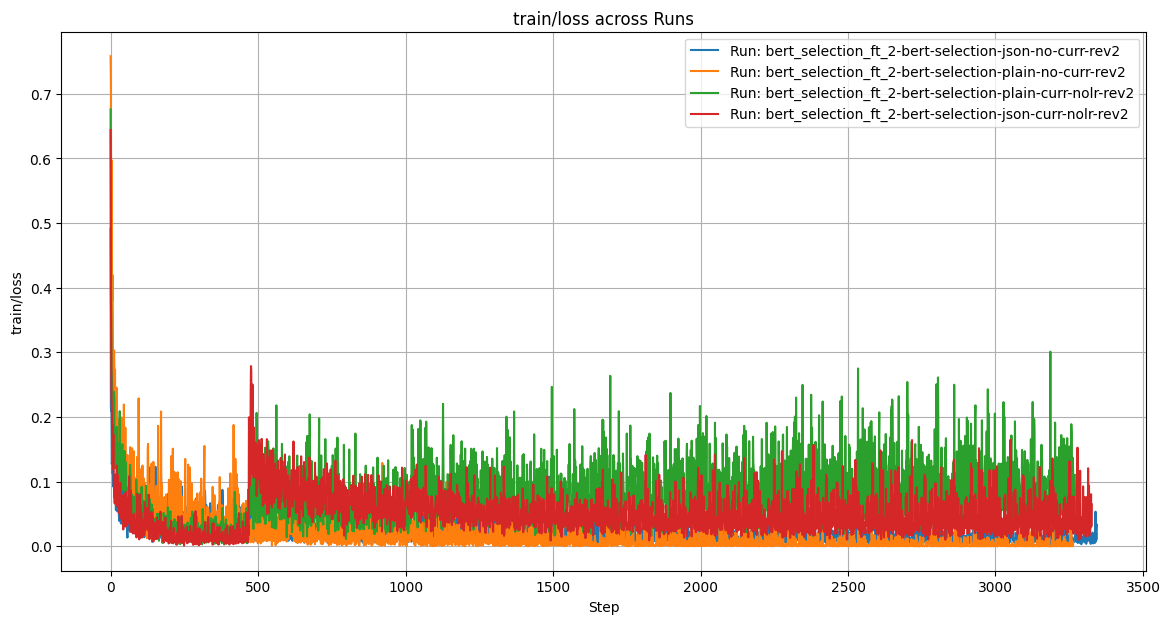

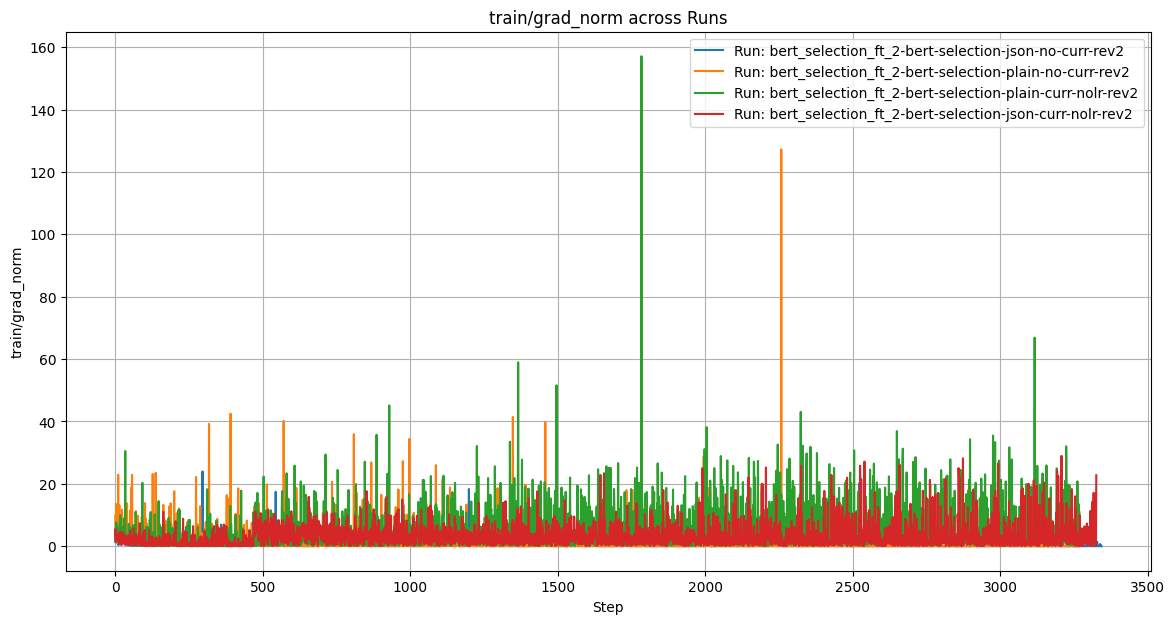

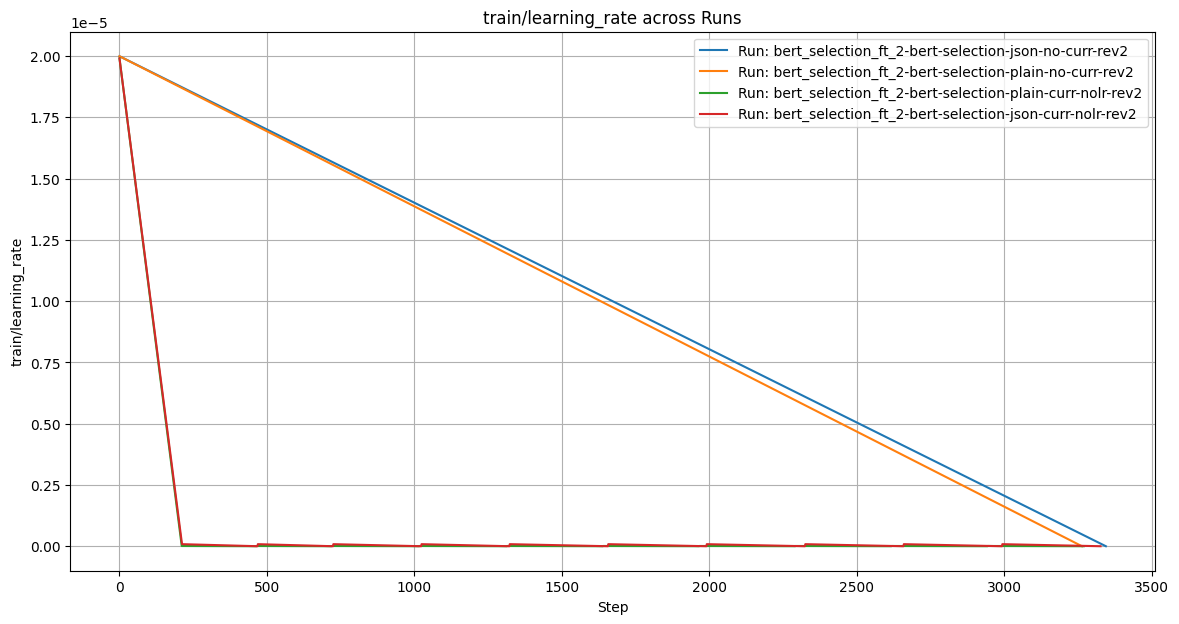

In [3]:
def plot_runs_data(runs, metric):
    plt.figure(figsize=(14, 7))
    for run in runs:
        hist = run.scan_history()
        # Convert to DataFrame
        hist_df = pd.DataFrame(hist)
        if hist_df.empty:
            continue
        if metric in hist_df.columns:
            # Filter out nans
            data = hist_df[metric].dropna()
            labels = list(range(len(data)))
            plt.plot(labels, data, label=f"Run: {run.name}")

    plt.xlabel("Step")
    plt.ylabel(metric)
    plt.title(f"{metric} across Runs")
    plt.legend()
    plt.grid()
    plt.show()

plot_runs_data(runs, "train/loss")
plot_runs_data(runs, "train/grad_norm")
plot_runs_data(runs, "train/learning_rate")

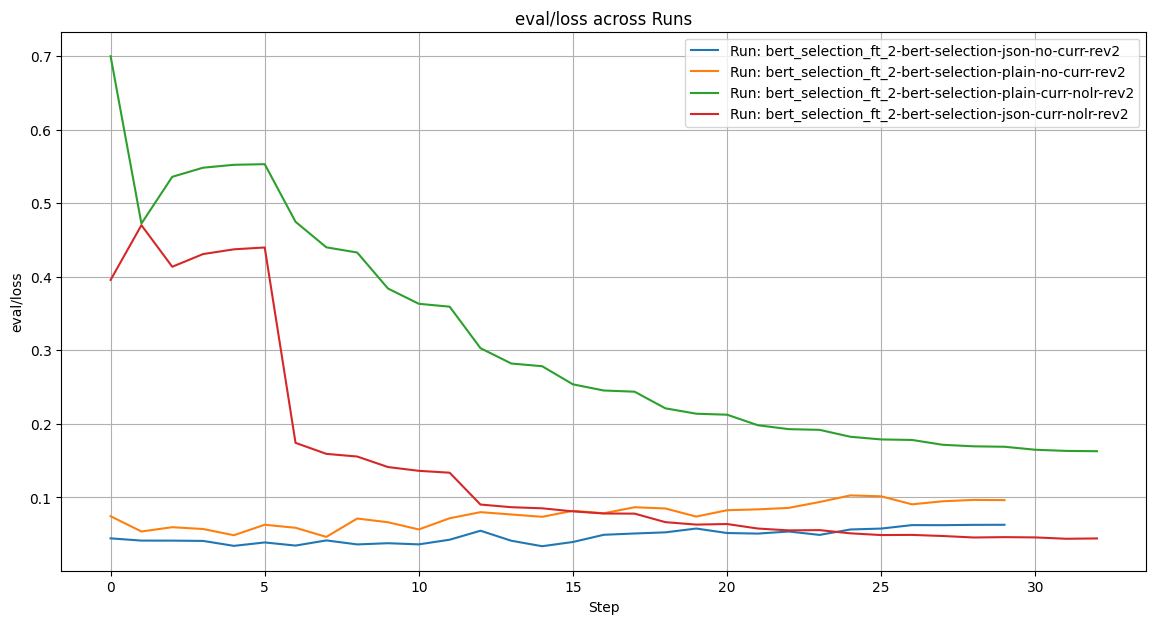

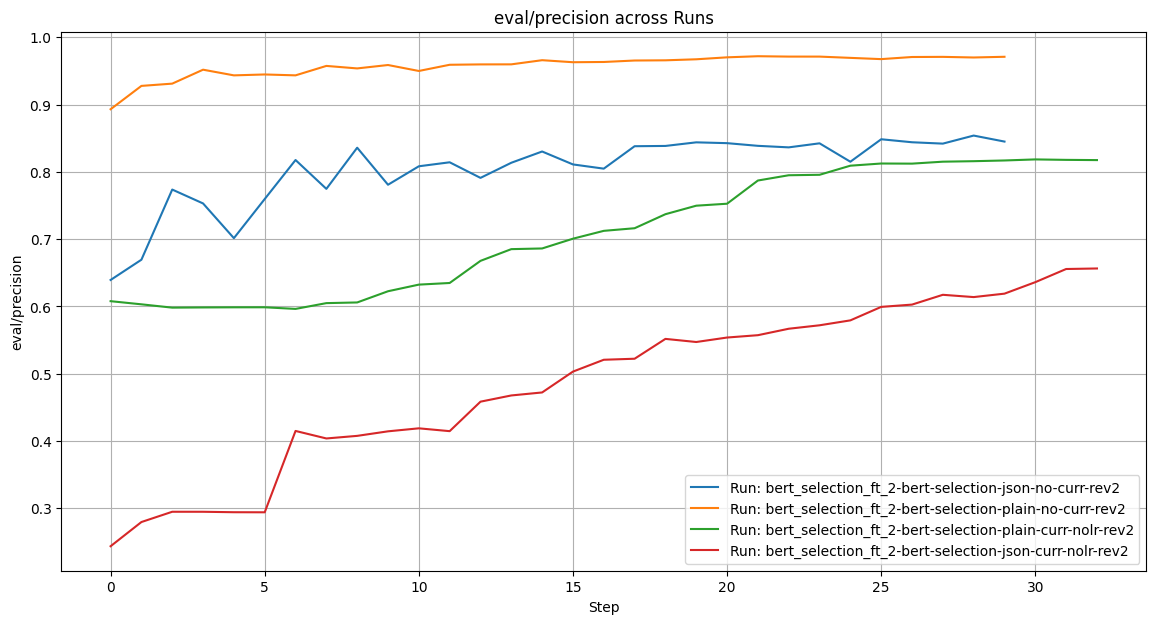

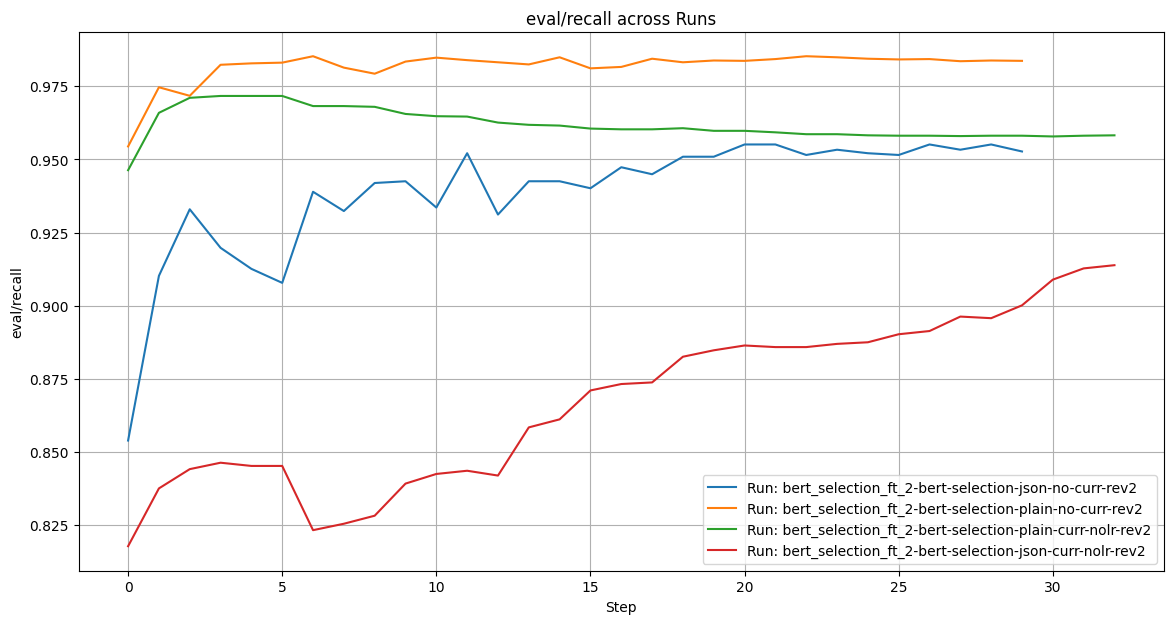

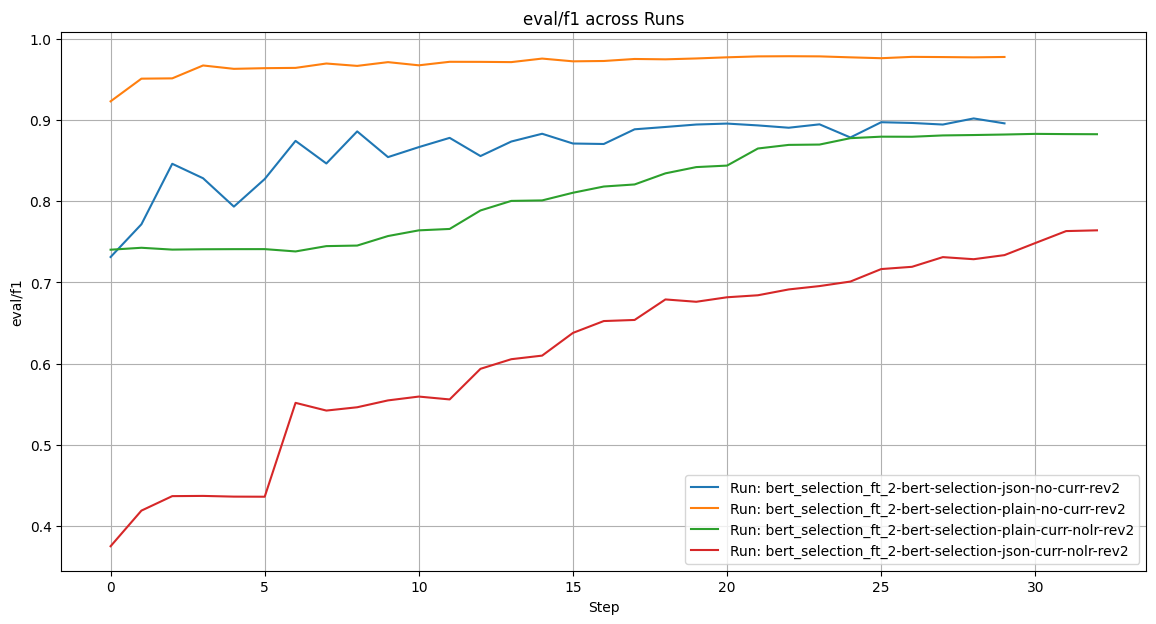

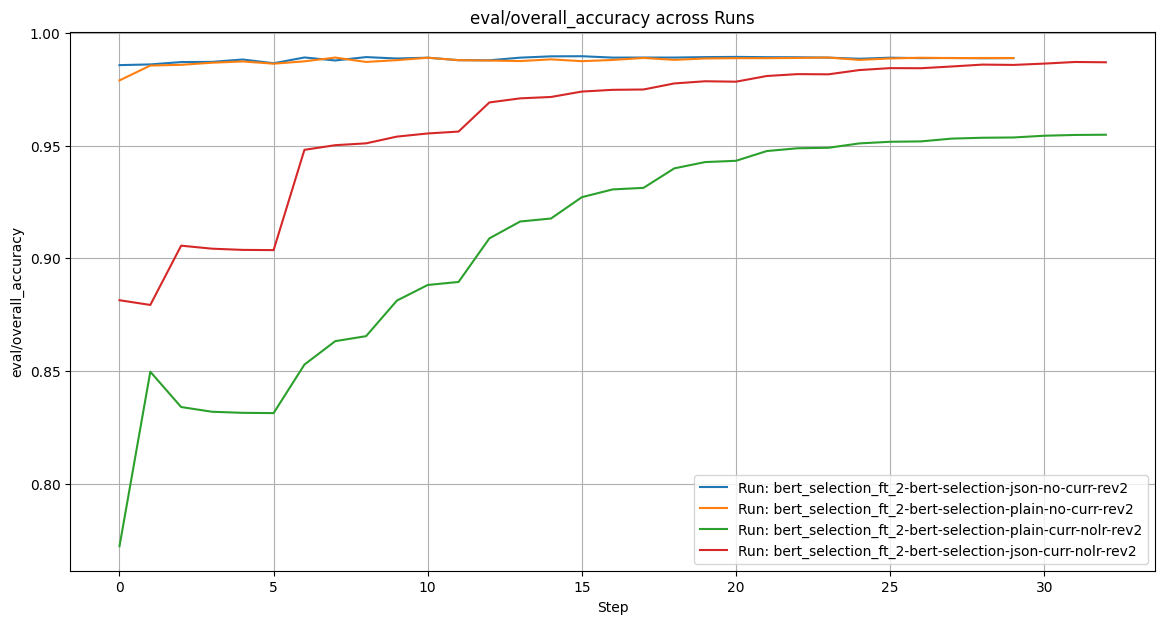

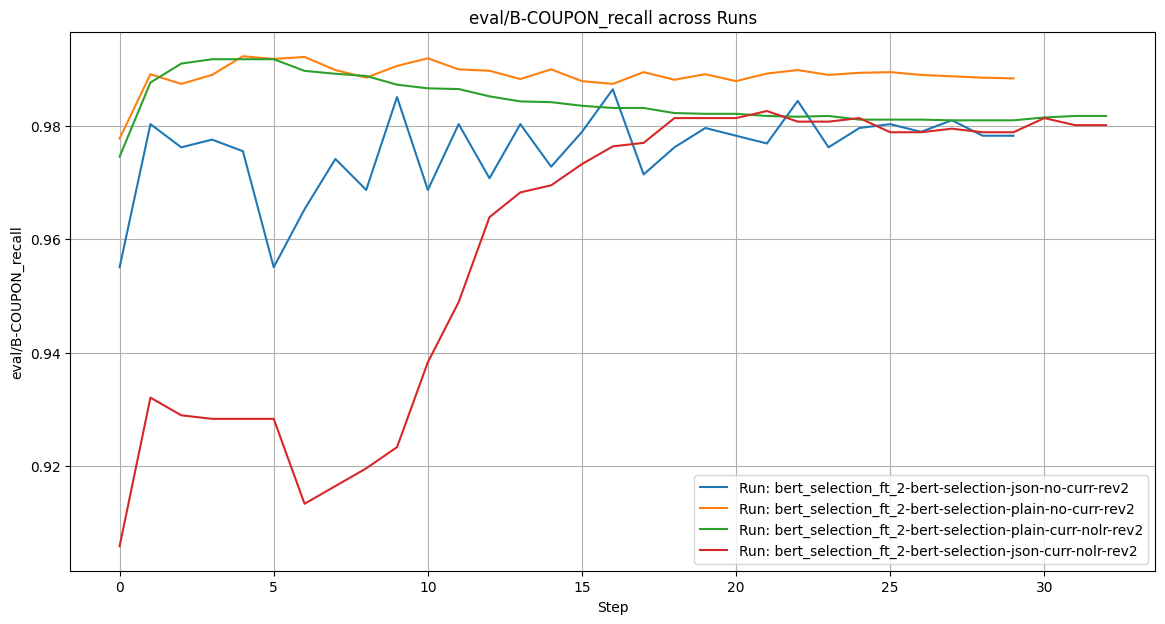

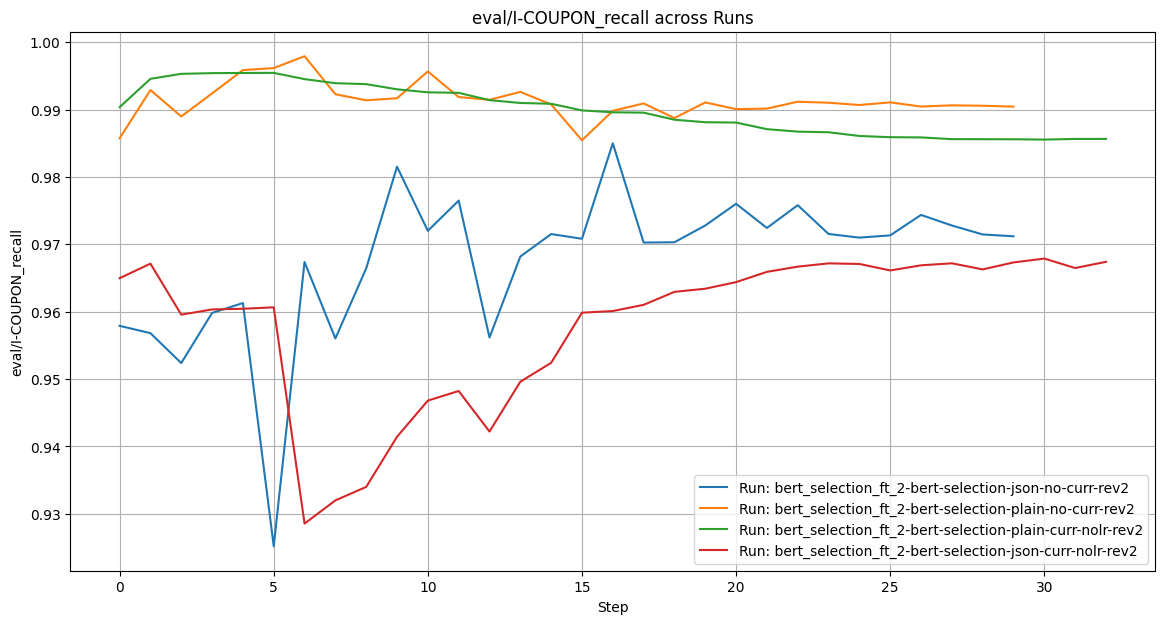

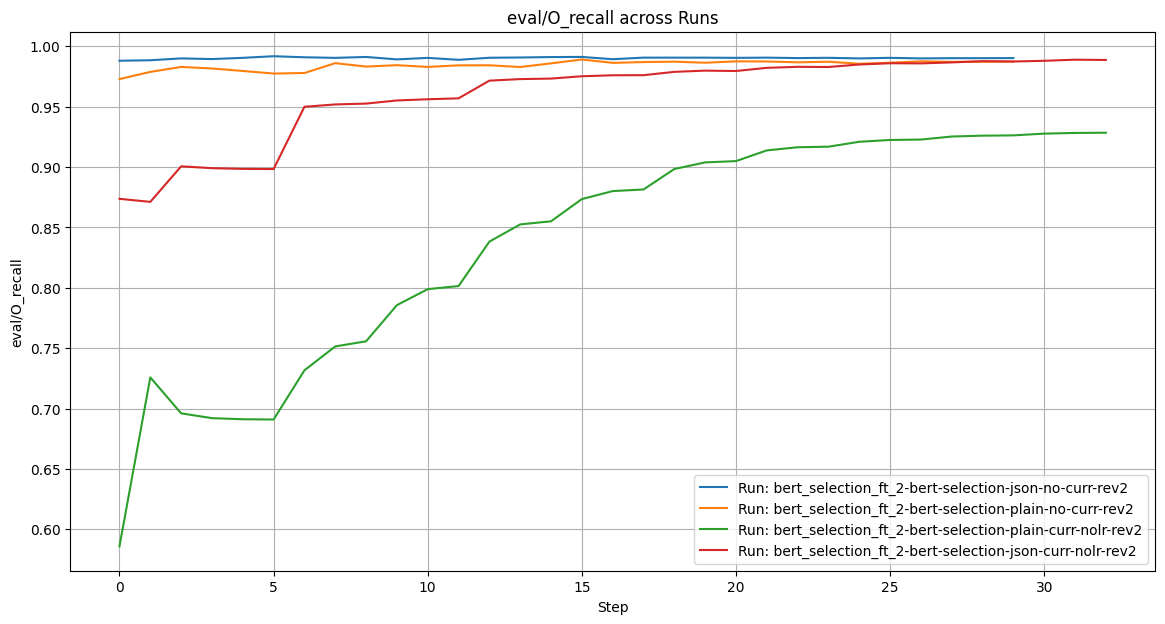

In [4]:
plot_runs_data(runs, "eval/loss")
plot_runs_data(runs, "eval/precision")
plot_runs_data(runs, "eval/recall")
plot_runs_data(runs, "eval/f1")
plot_runs_data(runs, "eval/overall_accuracy")
plot_runs_data(runs, "eval/B-COUPON_recall")
plot_runs_data(runs, "eval/I-COUPON_recall")
plot_runs_data(runs, "eval/O_recall")